# 1.0 Cài đặt thư viện

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import holidays

from IPython.core.display  import HTML
from IPython.display       import Image
from datetime              import date
from tabulate              import tabulate
from scipy.stats           import chi2_contingency

from boruta                import BorutaPy
from sklearn.ensemble      import RandomForestRegressor

from sklearn.metrics       import mean_absolute_error, mean_squared_error
from sklearn.linear_model  import LinearRegression, Lasso
from sklearn.ensemble      import RandomForestRegressor
import xgboost as xgb

import random
import warnings
warnings.filterwarnings('ignore')


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.4 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\khiem\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\khiem\AppData\Roaming\Python\Python312\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\khiem\AppData\Roaming\Python\Python312\site-packages\ipykernel\kernelapp.py", line 739, in start
    self.io_lo

ImportError: 
A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.4 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.




A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.4 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\khiem\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\khiem\AppData\Roaming\Python\Python312\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\khiem\AppData\Roaming\Python\Python312\site-packages\ipykernel\kernelapp.py", line 739, in start
    self.io_lo

ImportError: 
A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.4 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.




A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.4 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\khiem\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\khiem\AppData\Roaming\Python\Python312\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\khiem\AppData\Roaming\Python\Python312\site-packages\ipykernel\kernelapp.py", line 739, in start
    self.io_lo

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.4 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\khiem\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\khiem\AppData\Roaming\Python\Python312\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\khiem\AppData\Roaming\Python\Python312\site-packages\ipykernel\kernelapp.py", line 739, in start
    self.io_lo

ImportError: 
A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.4 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.



# 1.1 Hàm trợ giúp

In [4]:
# Tính trung bình phần trăm sai số (MPE)
def mean_percentage_error( y, yhat ):
    return np.mean( ( y - yhat ) / y )

def cross_validation( X_training, kfold, model_name, model, verbose=False ):
    
    mae_list  = []
    mape_list = []
    rmse_list = []
    
    for k in reversed( range( 1, kfold+1 ) ):
        if verbose:
            print( '\nKFold Number: {}'.format( k ) )
        # ngày bắt đầu và kết thúc cho validation 
        validation_start_date_1  = X_training[X_training['electric_company']==1]['datetime'].max() - datetime.timedelta( days=k*12*30 )
        validation_start_date_2  = X_training[X_training['electric_company']==2]['datetime'].max() - datetime.timedelta( days=k*12*30 )
        validation_start_date_3  = X_training[X_training['electric_company']==3]['datetime'].max() - datetime.timedelta( days=k*12*30 )
        validation_start_date_4  = X_training[X_training['electric_company']==4]['datetime'].max() - datetime.timedelta( days=k*12*30 )
        validation_start_date_5  = X_training[X_training['electric_company']==5]['datetime'].max() - datetime.timedelta( days=k*12*30 )
        validation_start_date_6  = X_training[X_training['electric_company']==6]['datetime'].max() - datetime.timedelta( days=k*12*30 )
        validation_start_date_7  = X_training[X_training['electric_company']==7]['datetime'].max() - datetime.timedelta( days=k*12*30 )
        validation_start_date_8  = X_training[X_training['electric_company']==8]['datetime'].max() - datetime.timedelta( days=k*12*30 )
        validation_start_date_9  = X_training[X_training['electric_company']==9]['datetime'].max() - datetime.timedelta( days=k*12*30 )
        validation_start_date_10 = X_training[X_training['electric_company']==10]['datetime'].max() - datetime.timedelta( days=k*12*30 )
        validation_start_date_11 = X_training[X_training['electric_company']==11]['datetime'].max() - datetime.timedelta( days=k*12*30 )
        validation_start_date_12 = X_training[X_training['electric_company']==12]['datetime'].max() - datetime.timedelta( days=k*12*30 )

        validation_end_date_1    = X_training[X_training['electric_company']==1]['datetime'].max() - datetime.timedelta( days=(k-1)*12*30 )
        validation_end_date_2    = X_training[X_training['electric_company']==2]['datetime'].max() - datetime.timedelta( days=(k-1)*12*30 )
        validation_end_date_3    = X_training[X_training['electric_company']==3]['datetime'].max() - datetime.timedelta( days=(k-1)*12*30 )
        validation_end_date_4    = X_training[X_training['electric_company']==4]['datetime'].max() - datetime.timedelta( days=(k-1)*12*30 )
        validation_end_date_5    = X_training[X_training['electric_company']==5]['datetime'].max() - datetime.timedelta( days=(k-1)*12*30 )
        validation_end_date_6    = X_training[X_training['electric_company']==6]['datetime'].max() - datetime.timedelta( days=(k-1)*12*30 )
        validation_end_date_7    = X_training[X_training['electric_company']==7]['datetime'].max() - datetime.timedelta( days=(k-1)*12*30 )
        validation_end_date_8    = X_training[X_training['electric_company']==8]['datetime'].max() - datetime.timedelta( days=(k-1)*12*30 )
        validation_end_date_9    = X_training[X_training['electric_company']==9]['datetime'].max() - datetime.timedelta( days=(k-1)*12*30 )
        validation_end_date_10   = X_training[X_training['electric_company']==10]['datetime'].max() - datetime.timedelta( days=(k-1)*12*30 )
        validation_end_date_11   = X_training[X_training['electric_company']==11]['datetime'].max() - datetime.timedelta( days=(k-1)*12*30 )
        validation_end_date_12   = X_training[X_training['electric_company']==12]['datetime'].max() - datetime.timedelta( days=(k-1)*12*30 )
            
        # lọc dữ liệu
        training = X_training[ ( (X_training['electric_company']==1) & (X_training['datetime'] < validation_start_date_1) )
                 | ( (X_training['electric_company']==2) & (X_training['datetime'] < validation_start_date_2) )
                 | ( (X_training['electric_company']==3) & (X_training['datetime'] < validation_start_date_3) )
                 | ( (X_training['electric_company']==4) & (X_training['datetime'] < validation_start_date_4) )
                 | ( (X_training['electric_company']==5) & (X_training['datetime'] < validation_start_date_5) )
                 | ( (X_training['electric_company']==6) & (X_training['datetime'] < validation_start_date_6) )
                 | ( (X_training['electric_company']==7) & (X_training['datetime'] < validation_start_date_7) )
                 | ( (X_training['electric_company']==8) & (X_training['datetime'] < validation_start_date_8) )
                 | ( (X_training['electric_company']==9) & (X_training['datetime'] < validation_start_date_9) )
                 | ( (X_training['electric_company']==10)  & (X_training['datetime'] < validation_start_date_10) ) 
                 | ( (X_training['electric_company']==11) & (X_training['datetime'] < validation_start_date_11) )
                 | ( (X_training['electric_company']==12) & (X_training['datetime'] < validation_start_date_12) ) ]
        
        validation = X_training[ ( (X_training['electric_company']==1) & (X_training['datetime'] >= validation_start_date_1) & (X_training['datetime'] <= validation_end_date_1) ) 
                 | ( (X_training['electric_company']==2) & (X_training['datetime'] >= validation_start_date_2) & (X_training['datetime'] <= validation_end_date_2) )
                 | ( (X_training['electric_company']==3) & (X_training['datetime'] >= validation_start_date_3) & (X_training['datetime'] <= validation_end_date_3) )
                 | ( (X_training['electric_company']==4) & (X_training['datetime'] >= validation_start_date_4) & (X_training['datetime'] <= validation_end_date_4) )
                 | ( (X_training['electric_company']==5) & (X_training['datetime'] >= validation_start_date_5) & (X_training['datetime'] <= validation_end_date_5) )
                 | ( (X_training['electric_company']==6) & (X_training['datetime'] >= validation_start_date_6) & (X_training['datetime'] <= validation_end_date_6) )
                 | ( (X_training['electric_company']==7) & (X_training['datetime'] >= validation_start_date_7) & (X_training['datetime'] <= validation_end_date_7) )
                 | ( (X_training['electric_company']==8) & (X_training['datetime'] >= validation_start_date_8) & (X_training['datetime'] <= validation_end_date_8) )
                 | ( (X_training['electric_company']==9) & (X_training['datetime'] >= validation_start_date_9) & (X_training['datetime'] <= validation_end_date_9) )
                 | ( (X_training['electric_company']==10) & (X_training['datetime'] >= validation_start_date_10) & (X_training['datetime'] <= validation_end_date_10) ) 
                 | ( (X_training['electric_company']==11) & (X_training['datetime'] >= validation_start_date_11) & (X_training['datetime'] <= validation_end_date_11) )
                 | ( (X_training['electric_company']==12) & (X_training['datetime'] >= validation_start_date_12) & (X_training['datetime'] <= validation_end_date_12) ) ]
        
        # tập dữ liệu training và validation
        # training
        xtraining = training.drop( ['datetime', 'mw_energy_consumption' ], axis=1 )
        ytraining = training['mw_energy_consumption']

        # validation
        xvalidation = validation.drop( ['datetime', 'mw_energy_consumption'], axis=1 )
        yvalidation = validation['mw_energy_consumption']

        # model
        m = model.fit( xtraining, ytraining )

        # dự đoán
        yhat = m.predict( xvalidation )

        # hiệu suất
        m_result = ml_error( model_name, np.expm1( yvalidation ), np.expm1( yhat ) )

        # lưu hiệu suất của mỗi lần lặp kfold
        mae_list.append( m_result['MAE'] )
        mape_list.append( m_result['MAPE'] )
        rmse_list.append( m_result['RMSE'] )

    return pd.DataFrame( { 'Model Name': model_name,
                            'MAE CV': np.round( np.mean( mae_list ), 2 ).astype( str ) + ' +/- ' + np.round( np.std( mae_list ), 2 ).astype( str ),
                            'MAPE CV': np.round( np.mean( mape_list ), 2 ).astype( str ) + ' +/- ' + np.round( np.std( mape_list ), 2 ).astype( str ),
                            'RMSE CV': np.round( np.mean( rmse_list ), 2 ).astype( str ) + ' +/- ' + np.round( np.std( rmse_list ), 2 ).astype( str ) }, index=[0] )

# Tính trung bình phần trăm sai số tuyệt đối
def mean_absolute_percentage_error( y, yhat ):
    return np.mean( np.abs( (y - yhat ) / y ) )

#Tính các chỉ số đánh giá mô hình
def ml_error( model_name, y, yhat ):
    mae = mean_absolute_error( y, yhat ) #sai số tuyệt đối trung bình
    mape = mean_absolute_percentage_error( y, yhat ) #Phần trăm sai số tuyệt đối trung bình
    rmse = np.sqrt( mean_squared_error( y, yhat ) ) #Căn bậc 2 của sai số bình phương trung bình
    
    return pd.DataFrame( { 'Model Name': model_name,
                           'MAE': mae,
                           'MAPE': mape,
                           'RMSE': rmse }, index=[0] )

#Tính Cramer - 1 thước đo dộ liên quan giữa 2 biến phân loại 
def cramer_v( x, y ):
    cm = pd.crosstab( x, y ).values
    n = cm.sum()
    r, k = cm.shape
    
    chi2 = chi2_contingency( cm )[0]
    chi2corr = max( 0, chi2 - (k-1)*(r-1)/(n-1) )
    
    kcorr = k - (k-1)**2/(n-1)
    rcorr = r - (r-1)**2/(n-1)

    return np.sqrt( (chi2corr/n) / ( min( kcorr-1, rcorr-1 ) ) )

# Thiết lập môi trường Jupyter Notebook cho trực quan hóa và hiển thị dữ liệu đẹp hơn.
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()

In [5]:
jupyter_settings()

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


# 1.2 Đọc dữ liệu

In [6]:
# Đọc dữ liệu train
aep = pd.read_csv('data/train/AEP_hourly_train.csv', low_memory=False)
comed = pd.read_csv('data/train/COMED_hourly_train.csv', low_memory=False)
dayton = pd.read_csv('data/train/DAYTON_hourly_train.csv', low_memory=False)
deok = pd.read_csv('data/train/DEOK_hourly_train.csv', low_memory=False)
dom = pd.read_csv('data/train/DOM_hourly_train.csv', low_memory=False)
duq = pd.read_csv('data/train/DUQ_hourly_train.csv', low_memory=False)
ekpc = pd.read_csv('data/train/EKPC_hourly_train.csv', low_memory=False)
fe = pd.read_csv('data/train/FE_hourly_train.csv', low_memory=False)
ni = pd.read_csv('data/train/NI_hourly_train.csv', low_memory=False)
pjm = pd.read_csv('data/train/PJM_Load_hourly_train.csv', low_memory=False)
pjme = pd.read_csv('data/train/PJME_hourly_train.csv', low_memory=False)
pjmw = pd.read_csv('data/train/PJMW_hourly_train.csv', low_memory=False)

In [7]:
# Đọc dữ liệu test
aep_test = pd.read_csv('data/test/AEP_hourly_test.csv', low_memory=False)
comed_test = pd.read_csv('data/test/COMED_hourly_test.csv', low_memory=False)
dayton_test = pd.read_csv('data/test/DAYTON_hourly_test.csv', low_memory=False)
deok_test = pd.read_csv('data/test/DEOK_hourly_test.csv', low_memory=False)
dom_test = pd.read_csv('data/test/DOM_hourly_test.csv', low_memory=False)
duq_test = pd.read_csv('data/test/DUQ_hourly_test.csv', low_memory=False)
ekpc_test = pd.read_csv('data/test/EKPC_hourly_test.csv', low_memory=False)
fe_test = pd.read_csv('data/test/FE_hourly_test.csv', low_memory=False)
ni_test = pd.read_csv('data/test/NI_hourly_test.csv', low_memory=False)
pjm_test = pd.read_csv('data/test/PJM_Load_hourly_test.csv', low_memory=False)
pjme_test = pd.read_csv('data/test/PJME_hourly_test.csv', low_memory=False)
pjmw_test = pd.read_csv('data/test/PJMW_hourly_test.csv', low_memory=False)

In [8]:
# Thực hiện gộp tập dữ liệu train thành 1 và thêm 1 cột "electric_company" để xác định nơi phát điện.

aep['electric_company'] = 'AEP'
comed['electric_company'] = 'COMED'
dayton['electric_company'] = 'DAYTON'
deok['electric_company'] = 'DEOK'
dom['electric_company'] = 'DOM'
duq['electric_company'] = 'DUQ'
ekpc['electric_company'] = 'EKPC'
fe['electric_company'] = 'FE'
ni['electric_company'] = 'NI'
pjm['electric_company'] = 'PJM'
pjme['electric_company'] = 'PJME'
pjmw['electric_company'] = 'PJMW'

In [9]:
# Đổi tên cột ở tập dữ liệu train

aep = aep.rename( columns={'AEP_MW': 'mw_energy_consumption'} )
comed = comed.rename( columns={'COMED_MW': 'mw_energy_consumption'} )
dayton = dayton.rename( columns={'DAYTON_MW': 'mw_energy_consumption'} )
deok = deok.rename( columns={'DEOK_MW': 'mw_energy_consumption'} )
dom = dom.rename( columns={'DOM_MW': 'mw_energy_consumption'} )
duq = duq.rename( columns={'DUQ_MW': 'mw_energy_consumption'} )
ekpc = ekpc.rename( columns={'EKPC_MW': 'mw_energy_consumption'} )
fe = fe.rename( columns={'FE_MW': 'mw_energy_consumption'} )
ni = ni.rename( columns={'NI_MW': 'mw_energy_consumption'} )
pjm = pjm.rename( columns={'PJM_Load_MW': 'mw_energy_consumption'} )
pjme = pjme.rename( columns={'PJME_MW': 'mw_energy_consumption'} )
pjmw = pjmw.rename( columns={'PJMW_MW': 'mw_energy_consumption'} )

In [10]:
# Gộp các tập dữ liệu lại thành 1

df_raw = pd.concat( [aep, comed, dayton, deok, dom, duq, ekpc, fe, ni, pjm, pjme, pjmw] )
df_raw.sample(5) # check

,Datetime,mw_energy_consumption,electric_company
50437,2010-06-30 03:00:00,1426.0,DAYTON
1143,2004-11-14 16:00:00,1645.0,DAYTON
34549,2009-09-24 22:00:00,13066.0,DOM
83982,2011-06-01 03:00:00,30792.0,PJME
22072,2007-09-25 23:00:00,2509.0,DAYTON


In [11]:
# Tương tự đối với tập dữ liệu test

aep_test['electric_company'] = 'AEP'
comed_test['electric_company'] = 'COMED'
dayton_test['electric_company'] = 'DAYTON'
deok_test['electric_company'] = 'DEOK'
dom_test['electric_company'] = 'DOM'
duq_test['electric_company'] = 'DUQ'
ekpc_test['electric_company'] = 'EKPC'
fe_test['electric_company'] = 'FE'
ni_test['electric_company'] = 'NI'
pjm_test['electric_company'] = 'PJM'
pjme_test['electric_company'] = 'PJME'
pjmw_test['electric_company'] = 'PJMW'

aep_test = aep_test.rename( columns={'AEP_MW': 'mw_energy_consumption'} )
comed_test = comed_test.rename( columns={'COMED_MW': 'mw_energy_consumption'} )
dayton_test = dayton_test.rename( columns={'DAYTON_MW': 'mw_energy_consumption'} )
deok_test = deok_test.rename( columns={'DEOK_MW': 'mw_energy_consumption'} )
dom_test = dom_test.rename( columns={'DOM_MW': 'mw_energy_consumption'} )
duq_test = duq_test.rename( columns={'DUQ_MW': 'mw_energy_consumption'} )
ekpc_test = ekpc_test.rename( columns={'EKPC_MW': 'mw_energy_consumption'} )
fe_test = fe_test.rename( columns={'FE_MW': 'mw_energy_consumption'} )
ni_test = ni_test.rename( columns={'NI_MW': 'mw_energy_consumption'} )
pjm_test = pjm_test.rename( columns={'PJM_Load_MW': 'mw_energy_consumption'} )
pjme_test = pjme_test.rename( columns={'PJME_MW': 'mw_energy_consumption'} )
pjmw_test = pjmw_test.rename( columns={'PJMW_MW': 'mw_energy_consumption'} )

#check
df_raw_test = pd.concat( [aep_test, comed_test, dayton_test, deok_test, dom_test, duq_test, ekpc_test, fe_test, ni_test, pjm_test, pjme_test, pjmw_test] )
df_raw_test.sample(5) 

,Datetime,mw_energy_consumption,electric_company
6171,2009-12-19 19:00:00,13104.0,NI
16676,2014-01-17 14:00:00,2459.0,DAYTON
38927,2016-07-04 03:00:00,3630.0,PJMW
8835,2014-11-03 15:00:00,1608.0,DUQ
5011,2013-05-18 12:00:00,1822.0,DAYTON


In [12]:
#Kích thước tập dữ liệu train 
df_raw.shape

(654095, 3)

In [13]:
#Kích thước tập dliệu test
df_raw_test.shape

(436072, 3)

# 2.0 Mô tả dữ liệu
    Đây là quá trình khám phá, tóm tắt và trực quan hóa các đặc điểm của tập dữ liệu. Với các bước lần lượt sau đây:
        -   Mô tả kích thước dữ liệu 
        -   Mô tả kiểu dữ liệu 
        -   Kiểm tra giá trị rỗng - NULL
        -   Chèn dữ liệu rỗng (Không cần do dữ liệu của chúng ta đầy đủ và không NULL)
        -   Thống kê mô tả



In [14]:
# Tạo 1 bản copy để tránh thay đổi dữ liệu gốc
df1 = df_raw.copy()

# 2.1 Đổi tên cột 

In [15]:
cols_old = ['Datetime', 'mw_energy_consumption', 'electric_company']
cols_new = ['datetime', 'mw_energy_consumption', 'electric_company']
df1.columns = cols_new
df1.columns

Index(['datetime', 'mw_energy_consumption', 'electric_company'], dtype='object')

# 2.2 Kích thước dữ liệu

In [16]:
print( 'Số hàng: {}'.format( df1.shape[0] ) )
print( 'Số cột: {}'.format( df1.shape[1] ) )

Số hàng: 654095
Số cột: 3


# 2.3 Kiểu dữ liệu

In [17]:
# Chuyển kiểu dữ liệu của datatime -> "datetime"
df1['datetime'] = pd.to_datetime( df1['datetime'] )
df1.dtypes

datetime                 datetime64[ns]
mw_energy_consumption           float64
electric_company                 object
dtype: object

# 2.4 Kiểm tra rỗng

In [18]:
df1.isna().sum()

datetime                 0
mw_energy_consumption    0
electric_company         0
dtype: int64

# 2.5 Thống kê mô tả

In [19]:
# Chia chúng thành 2 phần là kiểu Numerical và Categorical. Do chúng có kĩ thuật xử lí là khác nhau
num_attributes = df1.select_dtypes( include=['float64'] ) #dự liệu dạng số
cat_attributes = df1.select_dtypes( exclude=['float64', 'datetime64[ns]'] ) #dữ liệu dạng văn bản

In [20]:
num_attributes.sample()

,mw_energy_consumption
25642,1498.0


In [21]:
cat_attributes.sample()

,electric_company
15105,PJM


### 2.5.1 Numerical Attributes - Phân tích thông kê mô tả số

In [22]:
# Xu hương trung tâm: trung bình, trung vị 
ct1 = pd.DataFrame( num_attributes.apply( np.mean ) ).T
ct2 = pd.DataFrame( num_attributes.apply( np.median ) ).T

# Phân tán
d1 = pd.DataFrame( num_attributes.apply( np.std ) ).T
d2 = pd.DataFrame( num_attributes.apply( min ) ).T
d3 = pd.DataFrame( num_attributes.apply( max ) ).T
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ).T
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) ).T
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() ) ).T

# Gộp dữ liệu trên
m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6] ).T.reset_index()
m.columns = ( ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis'])

# Hiển thị bảng dữ liệu thống kê số
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,mw_energy_consumption,0.0,62009.0,62009.0,11298.945239,8185.0,10650.299174,1.356182,1.185342


<Axes: xlabel='mw_energy_consumption', ylabel='Count'>

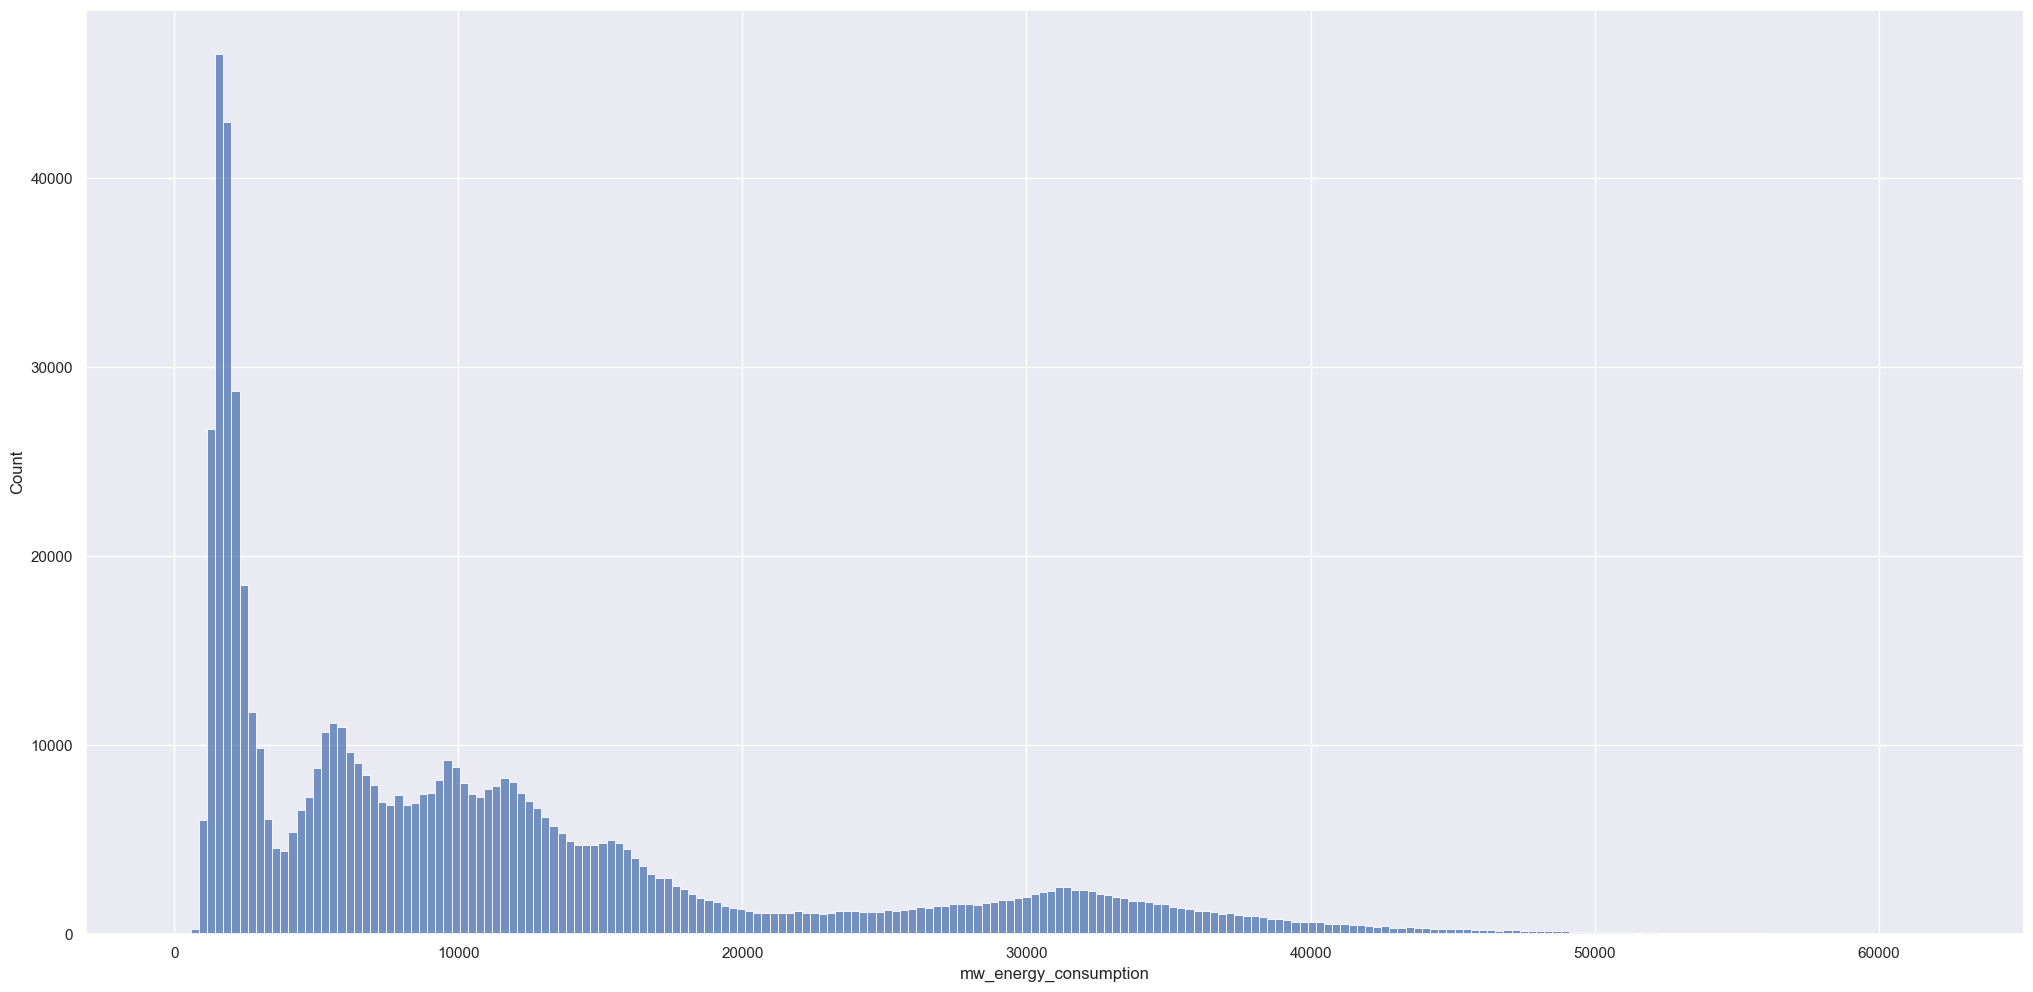

In [23]:
# Vẽ biểu đồ histogram (phân phối/ tần suất) 
# Trục X là mức tiêu thụ điện 
# Trục Y là số lượng (tần suất) các dòng dữ liệu có mức tiêu thụ ở mức tương ứng
sns.histplot( df1['mw_energy_consumption'] )

Từ biểu đồ trên ta có thể thấy rõ ràng sự phụ thuộc tần suất xuất hiện của giá trị lượng điện năng tiêu thụ hàng giờ.

### 2.5.2 Categorical Attibute - Thống kê mô tả theo đơn vị phát điện

In [24]:
cat_attributes.apply( lambda x: x.unique().shape[0] )
# Ta có thể biết được giá trị trong cột có 12 giá trị khác nhau và kiểu của chúng

electric_company    12
dtype: int64

<Axes: xlabel='electric_company', ylabel='mw_energy_consumption'>

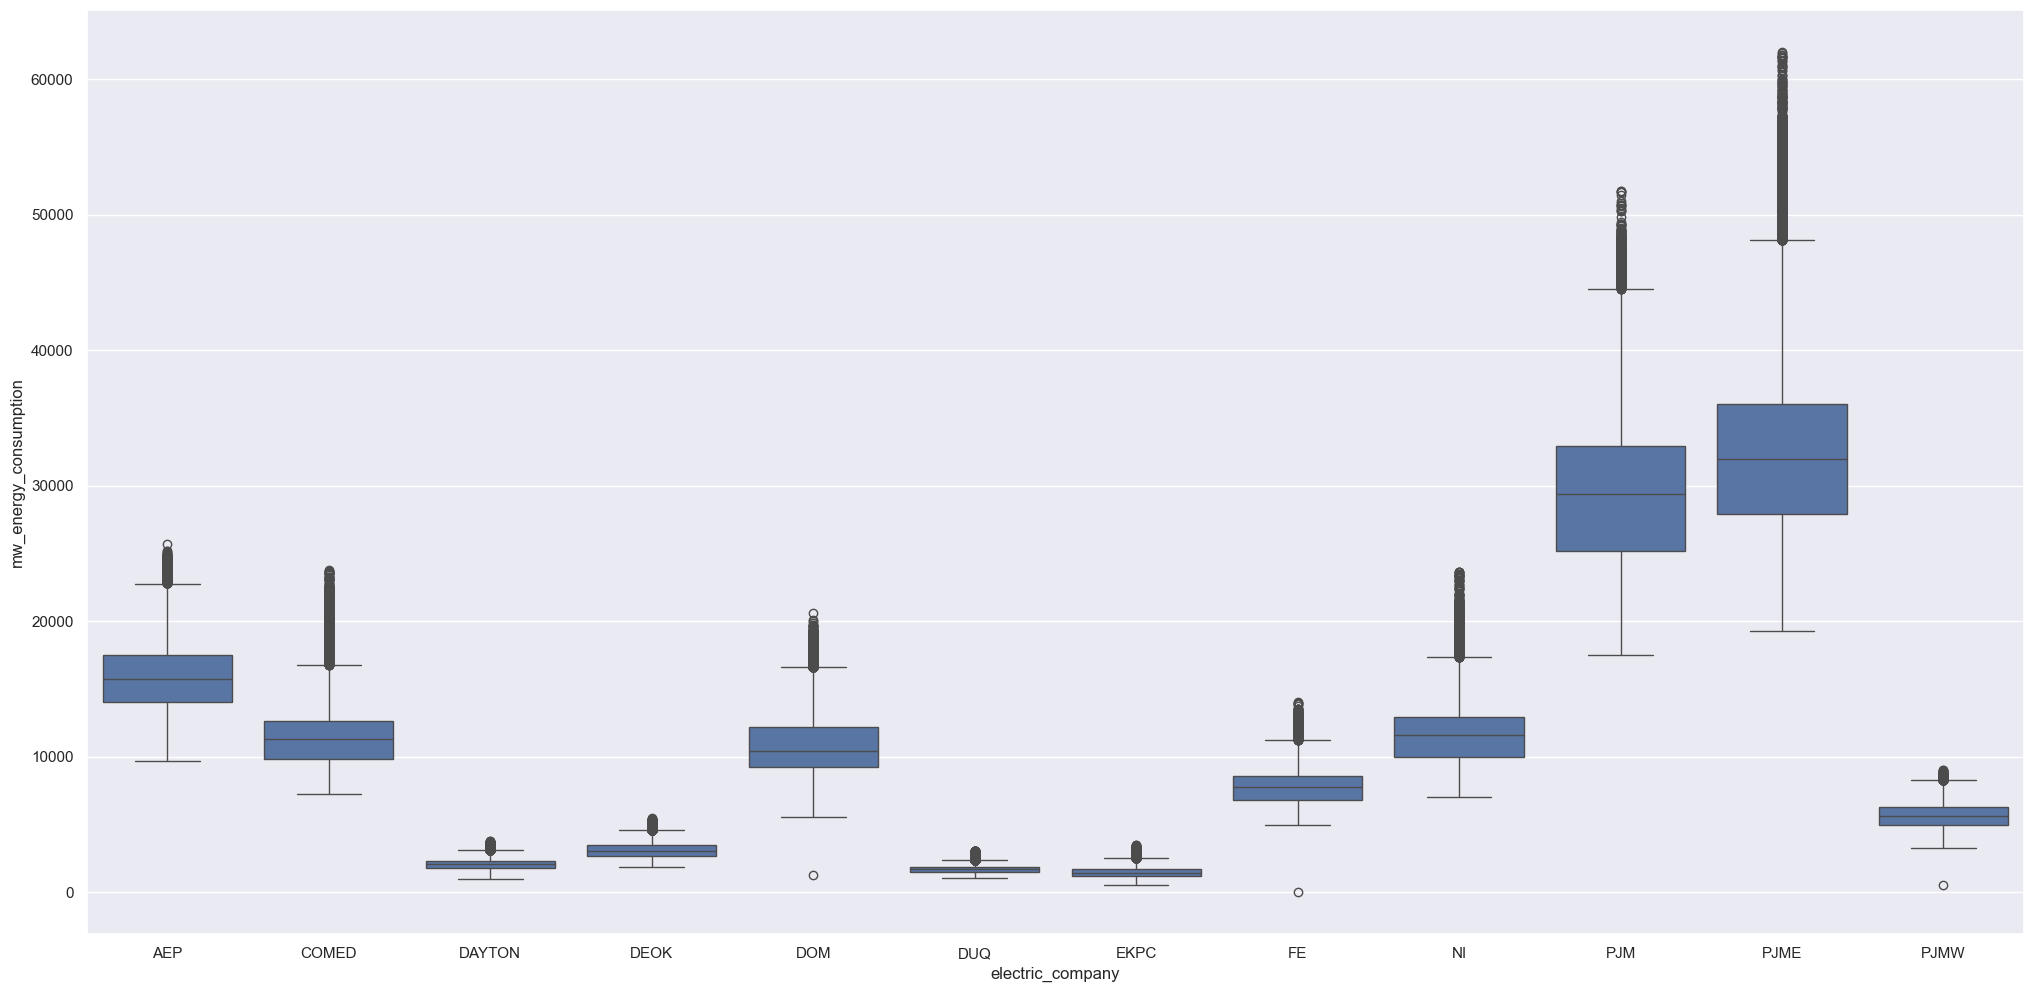

In [25]:
sns.boxplot( x= 'electric_company', y='mw_energy_consumption' , data=df1 )

Biểu diễn dưới dạng biểu đồ hộp boxplot với Ox là tên các cty điện lực và Oy là mức tiêu thụ điện năng.

    -   Đường ngang giữa hộp: Median - giá trị trung vị (Nằm giữa 50% dữ liệu)

    -   Đỉnh và đáy của hộp: Đại diện cho khoảng giữa 50% dữ liệu

    -   Dấu gạch dọc (whiskers): Kéo dài đến các điểm dữ liệu 

    -   Dấu tròn nhỏ bên ngoài (outliers): Các điểm nằm ngoài khoảng dữ liệu thông thường - có thể là bất thường hoặc cực trị 

# 3.0 Kỹ thuật tạo đặc trưng
    Đây là 1 kĩ thuật dùng để biến đổi, tạo mới hoặc chọn lọc các đặc trưng (features) từ dữ liệu thô sao cho cải thiện hiệu suất của mô hình học máy (machine learning).

In [26]:
df2 = df1.copy()

# 3.1 Tạo giả thiết

### 3.1.1 Giả thiết về nhân khẩu 

**1.** Người lớn tuổi thì sử dụng ít điện hơn

**2.** Các gia đình đông người thì tốn nhiều điện hơn ( là rõ )

**3.** Phụ nữ sử dụng nhiều điện hơn (tóc nhiều hơn=> sấy nhiều hơn)

**4.** Do gia đình đi làm, trẻ em đi học mà sáng sớm và chiều muộn sẽ sử dụng nhiều điện hơn

### 3.1.2 Giả thiết về địa lý

**1.** Mùa hè nóng dùng nhiều điện hơn do sử dụng điều hòa 

**2.** Nơi có nhiều thảm hỏa (động đất, bão tố) thì sẽ dùng nhiều điện hơn 


### 3.1.3 Giả thiết về văn hóa

**1.** Nơi có bộ lạc, dân tộc thiểu số thì dùng ít điện hơn

**2.** Nơi ở cộng đồng sử dụng ít điện hơn

**3.** Nhưng ngày lễ, lễ hội diễn ra sẽ sử dụng nhiều điện hơn 


# 3.2 Giả thiết sử dụng

Dựa vào tính chất của Dataframe ta sẽ quyết định sử dụng những giả thiết sau để phân tích

**1.** Sử dụng điện nhiều vào sáng sớm và chiều tối.

**2.** Các mùa có thời tiết nóng hoặc lạnh hơn sử dụng nhiều điện hơn 

**3.** Ngày lễ sử dụng nhiều điện hơn 

**4.** Cuối tuần sử dụng nhiều điện hơn 

# 3.3 Feature Engineering

In [33]:
# Ta cần lượng thông tin chỉ dựa vào các ngày mà không cần đến giờ
# Tạo 1 cột date mới trong df2, bỏ qua giờ (chỉ tính ngày) 

df2['date'] = df2['datetime'].dt.date

# Tọa cột year để phân tích xu hướng theo năm

df2['year'] = df2['datetime'].dt.year

# Tạo cột tháng 

df2['month'] = df2['datetime'].dt.month

# tạo cột giờ (0 -> 23)

df2['hour_of_day'] = df2['datetime'].dt.hour

# Xu hướng theo mùa:

# +> Mùa đồng: Từ tháng 12 đến tháng 2
# +> Mùa xuân: Từ tháng 3 đén tháng 5
# +> Mùa hè: Từ tháng 6 đến tháng 8
# +> Mùa đông: Từ tháng 9 đến tháng 11

df2['season'] = df2['datetime'].apply( lambda x: 'Winter' if x.month == 12 or x.month == 1 or x.month == 2 
                                      else 'Spring' if  x.month == 3 or x.month == 4 or x.month == 5 
                                      else 'Summer' if  x.month == 6 or x.month == 7 or x.month == 8 
                                      else 'Autumn' if  x.month == 9 or x.month == 10 or x.month == 11 else '')


# Xu hướng ngày lễ hội:

# Sử dụng thư viện holidays để kiểm tra xem 1 ngày có phải ngày lễ tại Mỹ hay không
# Nếu là lễ => "Holiday", ngày hôm sau là lễ => "Holiday Eve", Còn lại trả về "Normal day"

us_holidays = set(holidays.US().keys())

def get_holiday_status(date):
    next_day = date.date() + datetime.timedelta(days=1)
    if date.date() in us_holidays:
        return 'Holiday'
    elif next_day in us_holidays:
        return 'Holiday Eve'
    return 'Normal day'

df2['holidays'] = df2['datetime'].apply(get_holiday_status)

# Ngày trong tuần: 

# 0 - Monday
# 1 - Tuesday
# 2 - Wednesday
# 3 - Thursday
# 4 - Friday
# 5 - Saturday
# 6 - Sunday

df2['day_of_week'] = df2['datetime'].dt.weekday


In [34]:
# Chuyển đổi kiểu dữ liệu trong cột date sang datetime 
df2['date'] = pd.to_datetime(df2['date'])
# check
df2.dtypes

datetime                 datetime64[ns]
mw_energy_consumption           float64
electric_company                 object
date                     datetime64[ns]
year                              int32
month                             int32
hour_of_day                       int32
season                           object
holidays                         object
day_of_week                       int32
dtype: object

In [36]:
#Chia kiểu dữ liệu thành Numerical và Categorical 

num_attributes = df2.select_dtypes( include=['int64', 'float64'] )
cat_attributes = df2.select_dtypes( exclude=['int64', 'float64', 'datetime64[ns]'] )

In [37]:
#Check
df2.sample(10).T

,47098,22084,2237,24097,33529,5321,22452,35143,21741,25785
datetime,2007-05-19 22:00:00,2014-06-25 08:00:00,2011-09-29 07:00:00,2008-12-02 07:00:00,2008-06-04 10:00:00,2005-05-24 19:00:00,2007-09-09 19:00:00,2006-09-29 17:00:00,2006-03-10 03:00:00,2007-04-23 16:00:00
mw_energy_consumption,4693.0,3300.0,9050.0,12859.0,17260.0,1639.0,18652.0,4999.0,9296.0,15970.0
electric_company,PJMW,DEOK,COMED,DOM,AEP,DUQ,AEP,PJMW,NI,AEP
date,2007-05-19 00:00:00,2014-06-25 00:00:00,2011-09-29 00:00:00,2008-12-02 00:00:00,2008-06-04 00:00:00,2005-05-24 00:00:00,2007-09-09 00:00:00,2006-09-29 00:00:00,2006-03-10 00:00:00,2007-04-23 00:00:00
year,2007,2014,2011,2008,2008,2005,2007,2006,2006,2007
month,5,6,9,12,6,5,9,9,3,4
hour_of_day,22,8,7,7,10,19,19,17,3,16
season,Spring,Summer,Autumn,Winter,Summer,Spring,Autumn,Autumn,Spring,Spring
holidays,Normal day,Normal day,Normal day,Normal day,Normal day,Normal day,Normal day,Normal day,Normal day,Normal day
day_of_week,5,2,3,1,2,1,6,4,4,0


# 4.0 - Lọc biến

Lọc biến (Variable Filtering) được sử dụng trong giai đoạn tiền xử lý dữ liệu (data preprocessing) hoặc trong quá trình chọn đặc trưng, nhằm giảm số lượng biến đầu vào trước khi đưa vào mô hình. Việc này giúp tăng hiệu quả mô hình, làm giảm overfitting, và cải thiện hiệu suất tính toán.

In [38]:
# Tạo bản copy mới 
df3 = df2.copy()

In [ ]:
df3.head()
# Dữ liệu đủ tốt và không cần thực hiện lọc biến

,datetime,mw_energy_consumption,electric_company,date,year,month,hour_of_day,season,holidays,day_of_week
0,2004-12-31 01:00:00,13478.0,AEP,2004-12-31,2004,12,1,Winter,Normal day,4
1,2004-12-31 02:00:00,12865.0,AEP,2004-12-31,2004,12,2,Winter,Normal day,4
2,2004-12-31 03:00:00,12577.0,AEP,2004-12-31,2004,12,3,Winter,Normal day,4
3,2004-12-31 04:00:00,12517.0,AEP,2004-12-31,2004,12,4,Winter,Normal day,4
4,2004-12-31 05:00:00,12670.0,AEP,2004-12-31,2004,12,5,Winter,Normal day,4


# 5.0 Khai phá dữ liệu - EDA

    EDA là quá trình khai phá dữ liệu để hiểu rõ hơn về: 

**1.** Cấu trúc dữ liệu 

**2.** Phân phối của các biến

**3.** Mối quan hệ giữa các biến 

**4.** Sự tồn tại của giá trị thiếu, ngoại lệ hay nhiễu

**5.** Những mô hình tiềm năng hoặc giả thiết cần kiểm tra sau này
    
    Các bước thực hiện EDA của ta trong PRJ này sẽ là:
        
        Phân tích đơn biên -> Phân tích hai biến -> Phân tích đa biến 

In [40]:
# Tạo bản copy 
df4 = df3.copy()

## 5.1 Phân tích đơn biến

### 5.1.1 Biến phản hồi

<Axes: xlabel='mw_energy_consumption', ylabel='Count'>

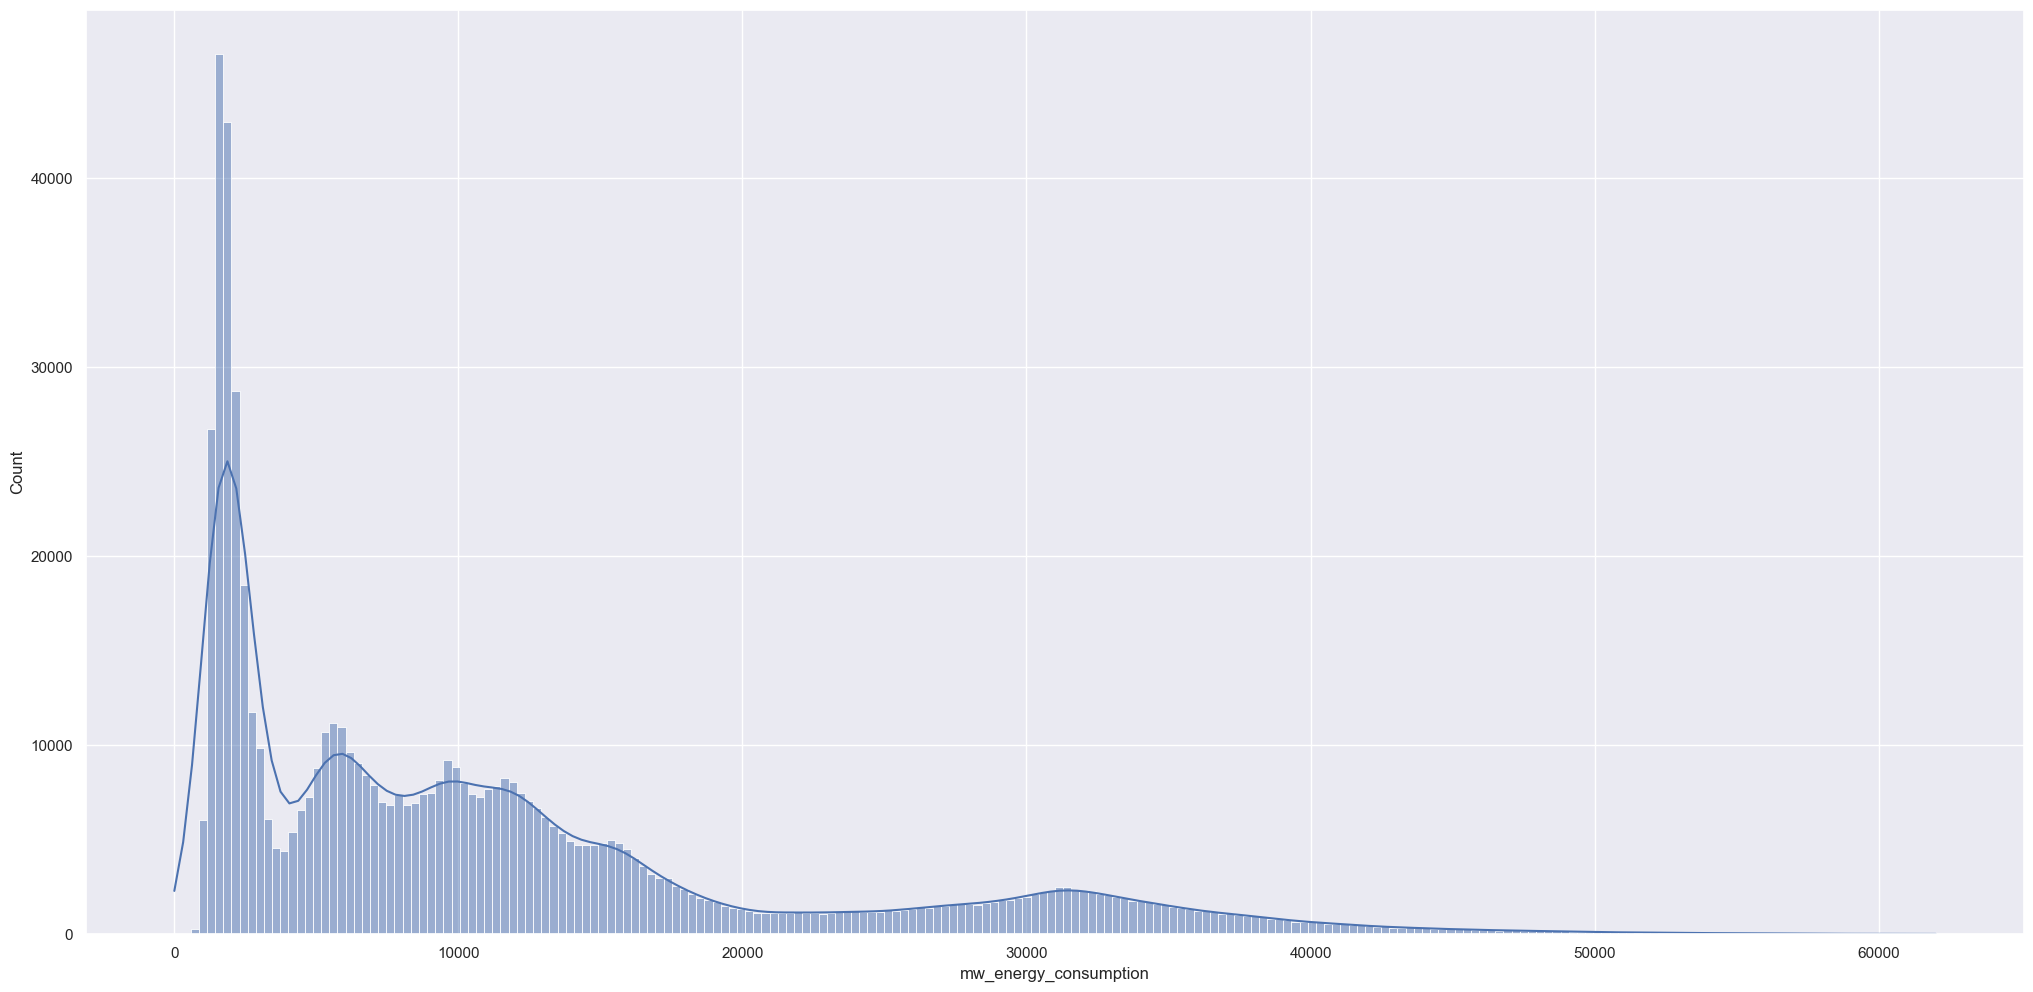

In [41]:
sns.histplot( df4['mw_energy_consumption'], kde=True )

In [ ]:
# Trên là hình ảnh biểu đồ histogram (biểu đồ tần suất)
# Trục hoành là giá trị điện tiêu thụ , Trục tung là tần số đạt giá trị điện tiêu thụ đó (Count)

#### Phân tích biểu đồ 

**1.** Phân phối không đều (lệch phải), hầu hết các giá trị tập trung ở mức thấp (gần 0 - 10kMW)

**2.** Nhiều đỉnh nhỏ -> Dữ liệu có nhiều sự thay đổi do nhiều feature khác nhau tác động 

**3.** Tồn tại số lượng oulier cao -> Vùng điện nằm ngoài 40kMW vẫn tồn tại -> Nhóm sử dụng điện lớn bất thường (có thể là ngày lễ)

**4.** Tiêu thu trung bình ở ngưỡng 0~2kMW

### 5.1.2 Biến kiểu số 

array([[<Axes: title={'center': 'mw_energy_consumption'}>]], dtype=object)

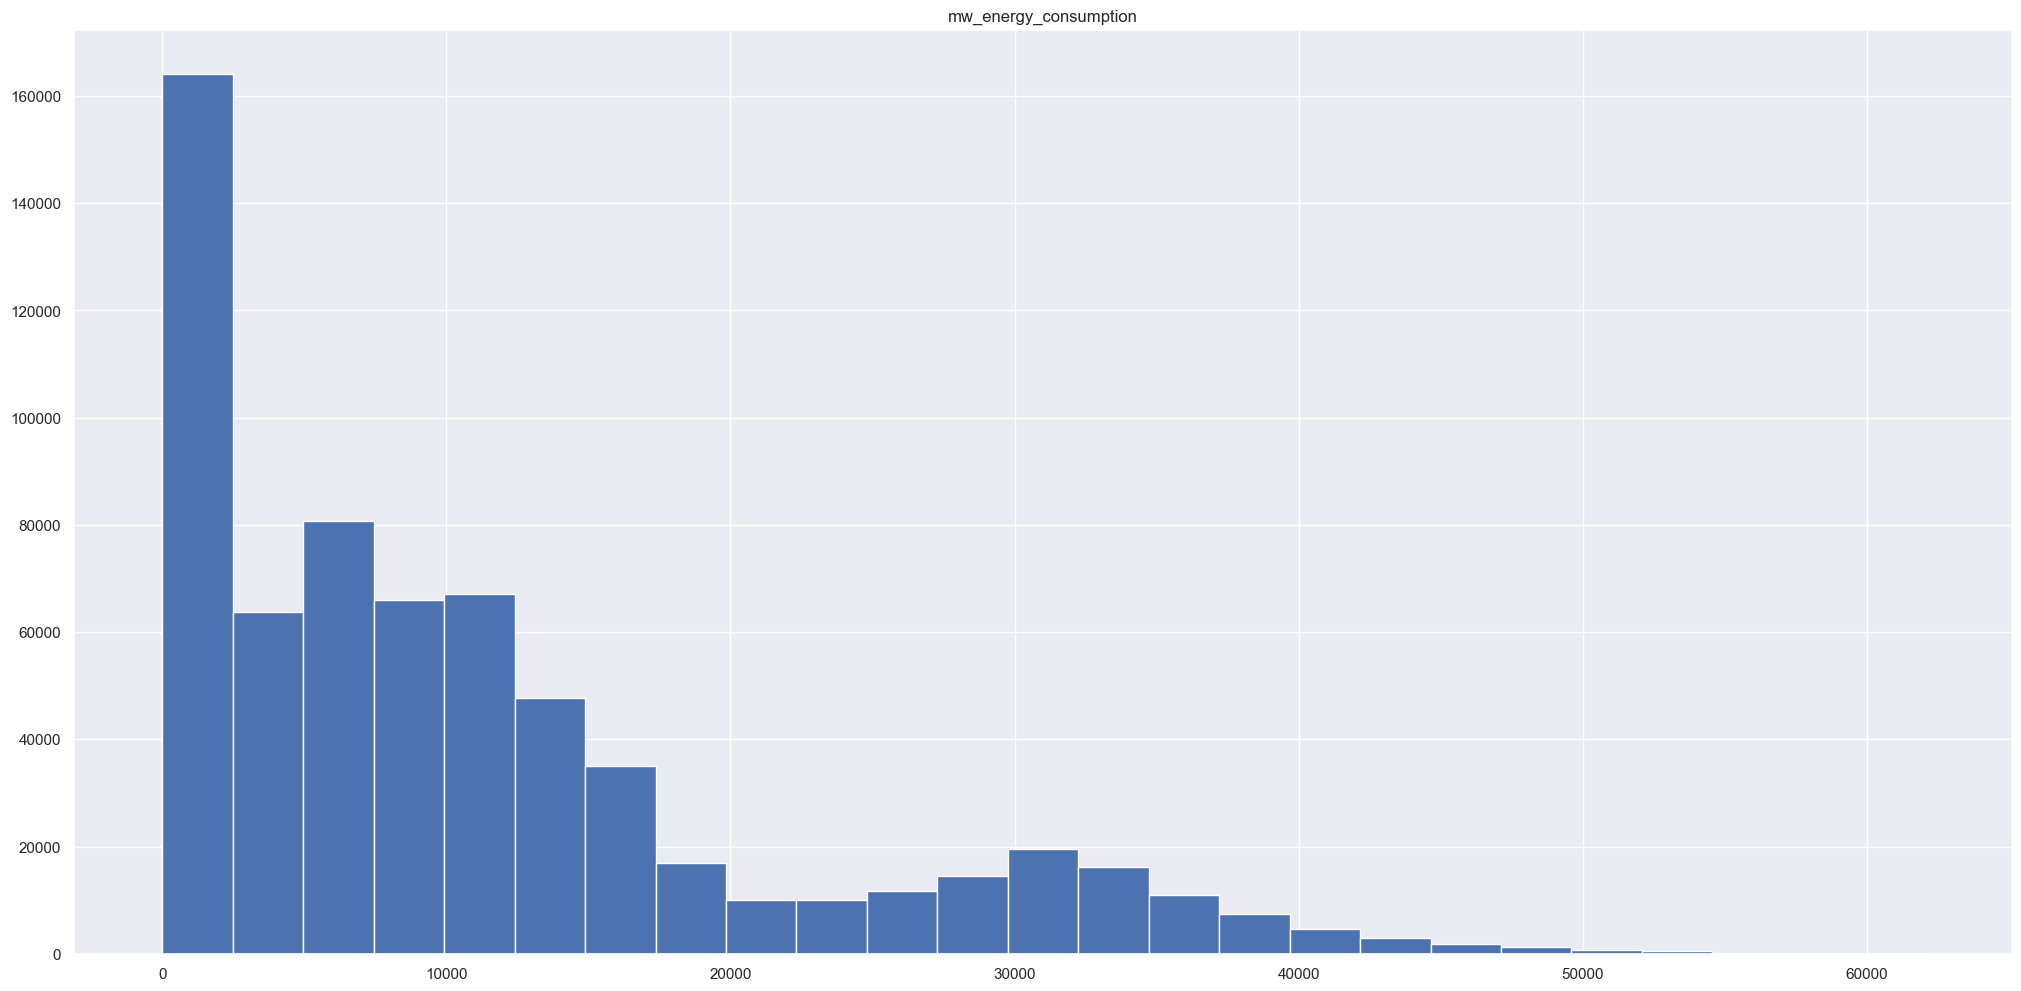

In [42]:
num_attributes.hist( bins=25 )

#### Phân tích biểu đồ 

**1.** Trên đây là biểu đồ cột được chia thành 25 khoảng (cột) với trục X là giá trị điện tiêu thụ đạt tới 

**2.** Phân phối lệch phải -> nhiều giá trị năng lượng tiêu thụ thấp (nằm gần 0)

**3.** Cột bên trái là cao nhất, tức là giá trị tiêu thụ MW nhỏ nhất chiếm tỷ lệ nhiều nhất

**4.** Biến động nhẹ ở mức trung bình -> Có những chỗ nhỗ lên nhẹ ở đoạn 20 -> 40 kMW

### 5.1.3 Biến Categorical

In [44]:
# Show biến
cat_attributes.head()

,electric_company,year,month,hour_of_day,season,holidays,day_of_week
0,AEP,2004,12,1,Winter,Normal day,4
1,AEP,2004,12,2,Winter,Normal day,4
2,AEP,2004,12,3,Winter,Normal day,4
3,AEP,2004,12,4,Winter,Normal day,4
4,AEP,2004,12,5,Winter,Normal day,4


In [46]:
# Thực hiện loại bỏ trùng lặp , để lấy ra danh sách đơn vị phát điện 
df4['electric_company'].drop_duplicates()

0       AEP
0     COMED
0    DAYTON
0      DEOK
0       DOM
0       DUQ
0      EKPC
0        FE
0        NI
0       PJM
0      PJME
0      PJMW
Name: electric_company, dtype: object

In [48]:
# Tương tự để lấy danh sách mùa
df4['season'].drop_duplicates()

0       Winter
744     Autumn
5134    Summer
7342    Spring
Name: season, dtype: object

<Axes: xlabel='mw_energy_consumption', ylabel='Density'>

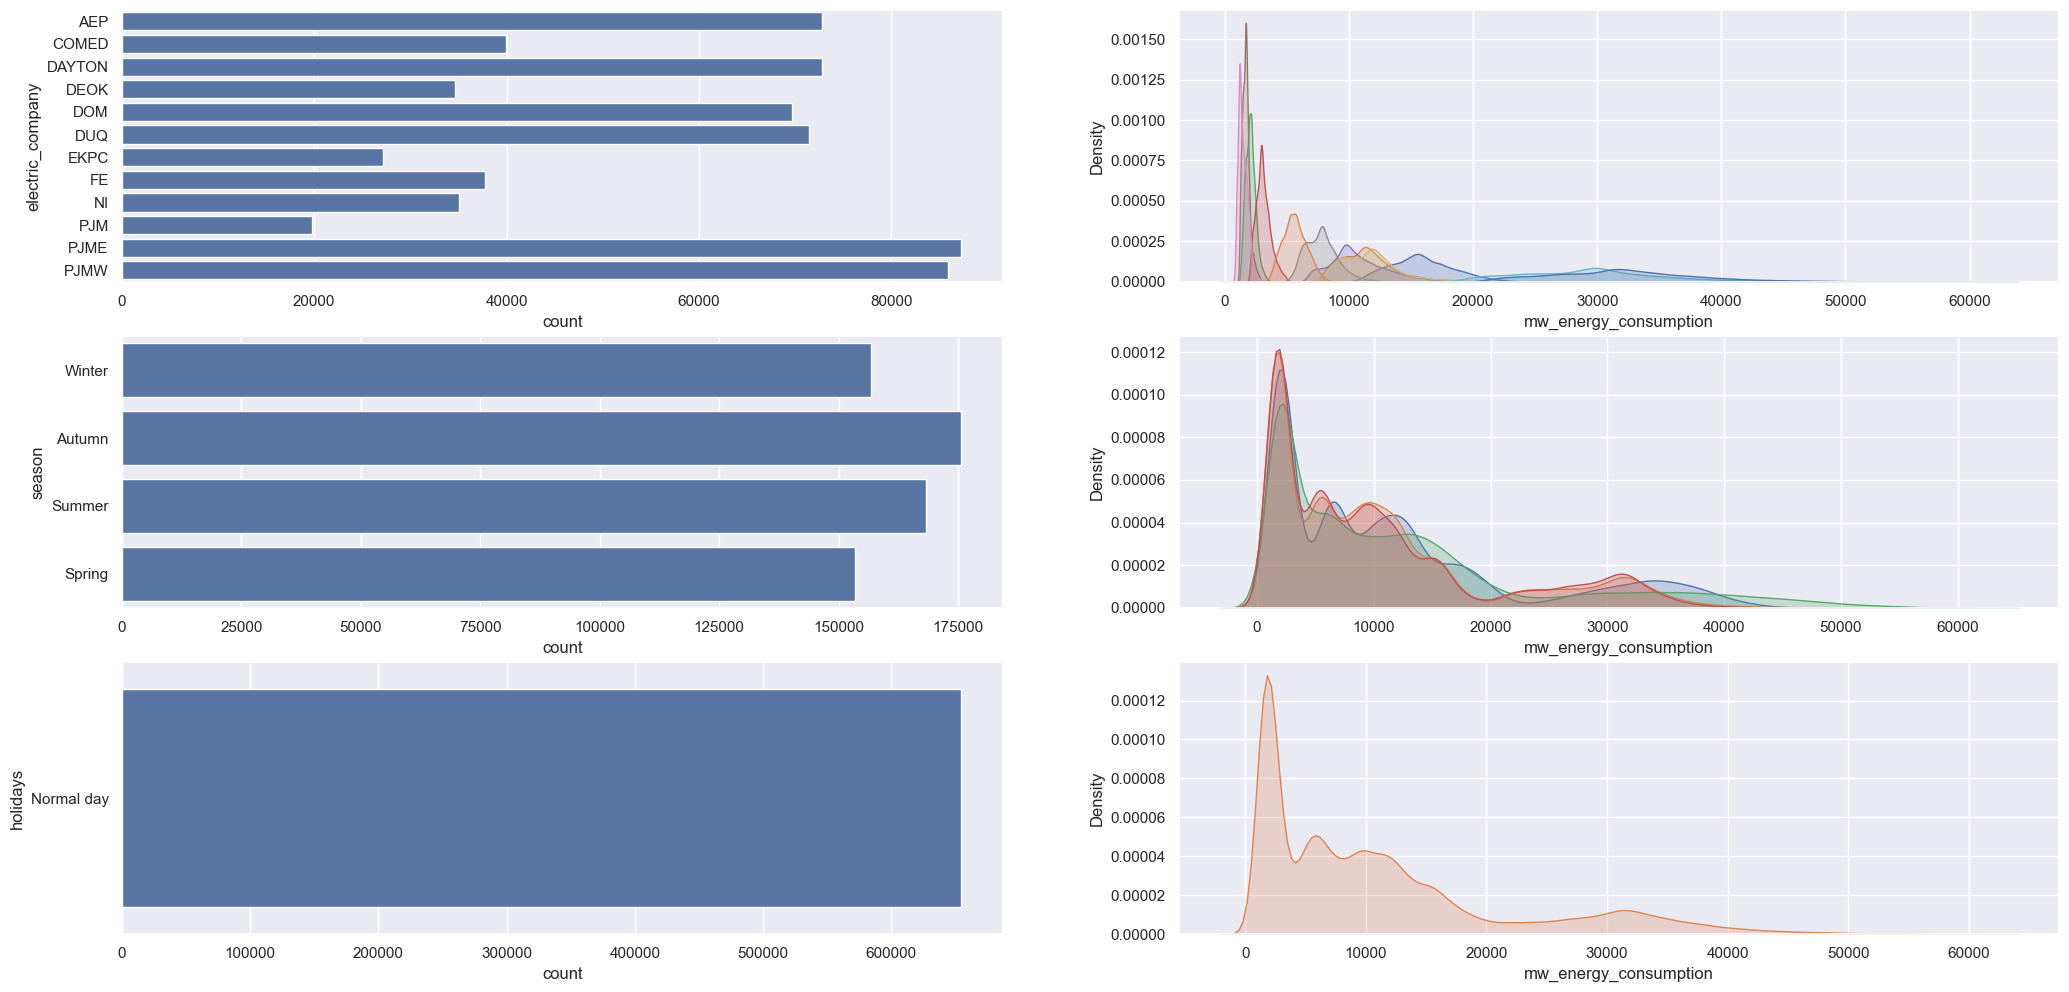

In [49]:
# electric_company

plt.subplot( 3, 2, 1)
sns.countplot( df4['electric_company'] )

plt.subplot( 3, 2, 2)
sns.kdeplot( df4[df4['electric_company'] == 'AEP']['mw_energy_consumption'], label='AEP', shade=True )
sns.kdeplot( df4[df4['electric_company'] == 'COMED']['mw_energy_consumption'], label='COMED', shade=True )
sns.kdeplot( df4[df4['electric_company'] == 'DAYTON']['mw_energy_consumption'], label='DAYTON', shade=True )
sns.kdeplot( df4[df4['electric_company'] == 'DEOK']['mw_energy_consumption'], label='DEOK', shade=True )
sns.kdeplot( df4[df4['electric_company'] == 'DOM']['mw_energy_consumption'], label='DOM', shade=True )
sns.kdeplot( df4[df4['electric_company'] == 'DUQ']['mw_energy_consumption'], label='DUQ', shade=True )
sns.kdeplot( df4[df4['electric_company'] == 'EKPC']['mw_energy_consumption'], label='EKPC', shade=True )
sns.kdeplot( df4[df4['electric_company'] == 'FE']['mw_energy_consumption'], label='FE', shade=True )
sns.kdeplot( df4[df4['electric_company'] == 'NI']['mw_energy_consumption'], label='NI', shade=True )
sns.kdeplot( df4[df4['electric_company'] == 'PJM']['mw_energy_consumption'], label='PJM', shade=True )
sns.kdeplot( df4[df4['electric_company'] == 'PJME']['mw_energy_consumption'], label='PJME', shade=True )
sns.kdeplot( df4[df4['electric_company'] == 'PJMW']['mw_energy_consumption'], label='PJMW', shade=True )

# season

plt.subplot( 3, 2, 3)
sns.countplot( df4['season'] )

plt.subplot( 3, 2, 4)
sns.kdeplot( df4[df4['season'] == 'Winter']['mw_energy_consumption'], label='Winter', shade=True )
sns.kdeplot( df4[df4['season'] == 'Autumn']['mw_energy_consumption'], label='Autumn', shade=True )
sns.kdeplot( df4[df4['season'] == 'Summer']['mw_energy_consumption'], label='Summer', shade=True )
sns.kdeplot( df4[df4['season'] == 'Spring']['mw_energy_consumption'], label='Spring', shade=True )

# holidays

plt.subplot( 3, 2, 5)
sns.countplot( df4['holidays'] )

plt.subplot( 3, 2, 6)
sns.kdeplot( df4[df4['holidays'] == 'Holiday']['mw_energy_consumption'], label='Holiday', shade=True )
sns.kdeplot( df4[df4['holidays'] == 'Normal day']['mw_energy_consumption'], label='Normal day', shade=True )